<a href="https://colab.research.google.com/github/DSlaughter01/machine_learning/blob/main/dev_dan_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

----------------------------------------------------
Machine Learning                      

Year 2022/2023

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es*

----------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In this homework we are going to work with the [*California Housing*](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) problem.

Complete the following exercises where you have to analyze the performance of diferent models as well different feature selection strategies.

Do not forget to analyze the results answering the proposed questions.

# 1. Performance evaluation of regression models (4 points)

To solve this section you will have to follow the next steps:
* 1. **Load database and preprocess the data**: use the function [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to load the data. Then, split it into training and test partitions (40% training and 60% test) and, finally, normalize it.  *Note: set the random seed of the training/test partition to $0$ to be able to replicate your results.*

* 2. **Train a regression model with polynomial variables**. Here we will use both *Ridge Regression* and LASSO models. To properly design these models, you must jointly validate the degree of the polynomial and the regularization parameter of the regressor. To perform this joint validation, it is recommended to define the model with a pipeline and validate the degree of the polynomial in the range $\{1, 2, 3, 4\}$  and the regularization parameter in $\{10^{-6}, 10^{-4}, 0.01, 1, 100\}$. Note that using 8 input variables, the polynomial extension cannot use a very high degree to avoid the *curse of dimensionality* problem, i.e., defining so many polynomial components leads to oversizing the new data set posing memory, computation, .... problems.

* 3. **Evaluation of the model on the test set and analysis of the results**. Measure the MSE on the test set.

* 4. Compare the performance of the above models with that of a **K-NN regressor**.

* 5. **Analysis of the results**: Analyze the results and try to answer these questions: What polynomial degree do polynomial regressors select? Why does K-NN improve these models? Why does a polynomial model of degree 3 or 4 not achieve similar performance to K-NN or at least improve the linear models?

## 2. Study of feature relevance (3 points)

In this section, using different criteria, you have to analyze the relevance of the input features.
To analyze the feature importances or relevances, you can use the following criteria:

1. **Relevance ranking based on correlation**: as we did in the introductory notebook, use the correlation to define a ranking of the most relevant features. For computing the correlation values, use the training data.

2. **Ridge linear regression weights**: We know that in a linear model *the weight magnitude can be an indicative of the feature relevance*. Train a Ridge Linear Regression model and use its weigth magnitude to generate a ranking of features.

3. Please, **analyze in detail the different results**. Why do these methods provide different results? Point out the advantages/disadvantages of each feature ranking scheme.

4. Use these feature relevances to apply a feature selection (selecting the $3$ most relevant features) and train the polynomial ridge regression model again (note that now you can use a higher polynomial degree, so try the poly degree values $\{1,5,10,15\}$). Do we get to improve the performance of this model? Why? Which feature relevance scheme performs better? Why?

# 3. Feature selection for non-linear models (3 points)

The above criteria for selecting variables are linear and then we are using a non-linear regressor, that is not the most appropriate. In this last section we are going to analyze the advantages of using a non-linear feature selection. So, implement and evaluate the performance of the following feature selection methods.

1. **[Mutual Information (MI)](https://en.wikipedia.org/wiki/Mutual_information)** as relevance criteria for feature ranking. Unlike correlation, MI is able to detect no-linear relationships between varaibles. Using the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression) obtain a ranking of variables based on MI and compute the performance provided with the 3 most relevant features over a Polynomial Ridge Regression model.


2. **Greedy search based on the validation error**: Other feature selection scheme can consist in training a classifier with a given subset of features and evalaute its validation error to analyze whether this selection is good or not.However, exploring all possible subsets  is usually computationally unflexible (there are $2^D$ combinations!!!!); so a greedy search (fordward or backward) is usually prefered:

  2.1 *Forward search*: It starts with an empty set and, iteratively, adds new features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Forward_search.png" width="48%" >

  2.2 *Backward search*: It starts considering all the features and, iteratively, removes features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Backward_search.png" width="48%" >


Discuss which of these strategies is most appropriate for use with a polymial Ridge Regression model. For the selected option, implement it and analyze the selected set of the three most relevant features, as well as its performance.



# Exercise 1, part 1: Importing and preprocessing the data

X_train_norm mean:
[ 7.55758505e-15  6.09977185e-17 -5.19477065e-15 -1.06267212e-14
 -5.13895020e-17  7.12452781e-16  3.56999637e-14 -6.43138643e-15]

X_train_norm standard deviation:
[1. 1. 1. 1. 1. 1. 1. 1.]

X_test_norm mean:
[ 0.00904015 -0.00274668  0.01298447  0.0068286  -0.00195439  0.0127458
  0.00946461 -0.00509713]

X_test_norm standard deviation:
[1.02956658 0.98870419 1.05275422 0.94597549 0.94851693 1.82290964
 1.00550819 0.99658059]



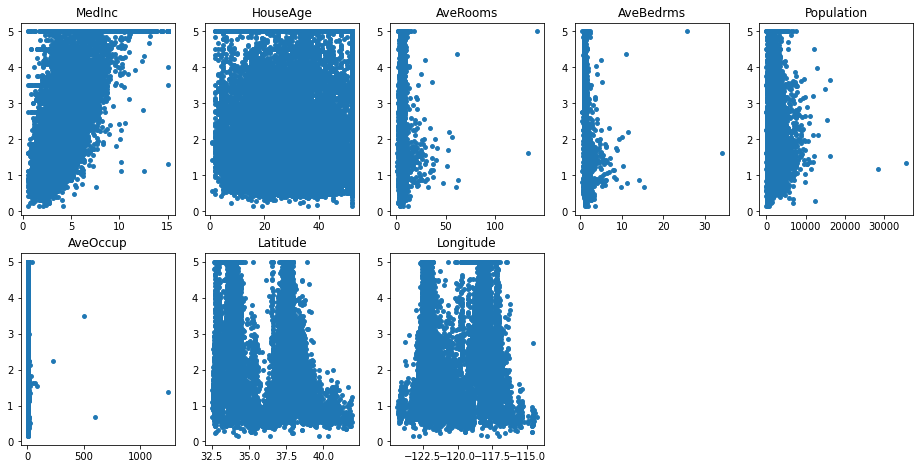

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Assign the data to a variable
cali = fetch_california_housing()

# Split the data into the relevant sections X with the target for each row
X = cali.data
Y = cali.target
column_names = cali.feature_names

# To see distribution per feature if required

D = X.shape[1]
plt.figure(figsize = (16,12))
for d in range (D):
  plt.subplot(3, 5, d+1)
  plt.scatter(X[:,d], Y, s = 15)
  plt.title(column_names[d])

# Split the data into train and test sections (40% training, 60% test, so put test_size = 0.6)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6, random_state = 0)

# To check the size of each section of data
# print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# Normalise the data using StandardScaler()
transformer = StandardScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
X_test_norm =  transformer.transform(X_test)

# To see the new mean and standard deviation for each column:
print(f"X_train_norm mean:\n{np.mean(X_train_norm, axis = 0)}\n")
print(f"X_train_norm standard deviation:\n{np.std(X_train_norm, axis = 0)}\n")
print(f"X_test_norm mean:\n{np.mean(X_test_norm, axis = 0)}\n")
print(f"X_test_norm standard deviation:\n{np.std(X_test_norm, axis = 0)}\n")


# Exercise 1, part 2: Training regression models with polynomial features

Ridge model

In [ ]:
# Import libraries specific to the problem:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# We define our pipeline with 3 steps:
ridge_pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('scaler', StandardScaler()),
                 ('ridge', Ridge())])

# Alpha range to be used in all of the tests in the exercises
alpha_range = [10**(i) for i in range(-6, 3, 2)]

# Define our tuning parameters: polynomial degree, and regularisation parameter
ridge_params = {'poly__degree': [1, 2, 3, 4],
          'ridge__alpha': alpha_range}

# Define the grid function with a 5 fold cross-validation, using MSE as a scoring metric
ridge_gs = GridSearchCV(estimator = ridge_pipe,
                  param_grid = ridge_params,
                  scoring = 'neg_mean_squared_error',
                  cv = 5)

# Fit the grid search function to the training set, and make predictions on the test set
ridge_gs.fit(X_train, Y_train)
ridge_test = ridge_gs.predict(X_test)

LASSO model

In [ ]:
# Import the LASSO model from sklearn
from sklearn.linear_model import Lasso

# Avoid warnings - otherwise the computer gives warnings that the function is not converging
from warnings import filterwarnings
filterwarnings('ignore')

# We define our pipeline with 3 steps:
lasso_pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('scaler', StandardScaler()),
                 ('lasso', Lasso())])

# Define our tuning parameters: polynomial degree, and regularisation parameter
lasso_params = {'poly__degree': [1, 2, 3, 4],
          'lasso__alpha': alpha_range}

# Define the grid function with a 5 fold cross-validation, using MSE as a scoring metric
lasso_gs = GridSearchCV(estimator = lasso_pipe,
                  param_grid = lasso_params,
                  scoring = 'neg_mean_squared_error',
                  cv = 5)

# Fit the grid search function, and make predictions on the test set
lasso_gs.fit(X_train, Y_train)
lasso_test = lasso_gs.predict(X_test)

# Exercise 1, part 3: Comparing the performance of the regression models

In [ ]:
# Calculate the mean square error (MSE) of the ridge and LASSO models

print(f"MSE for the ridge model = {np.mean((Y_test - ridge_test)**2)}")
print(f"MSE for the LASSO model = {np.mean((Y_test - lasso_test)**2)}")

MSE for the ridge model = 0.5419219732680354
MSE for the LASSO model = 0.5427719748073777


# Exercise 1, part 4: Comparing performance with a kNN model

In [ ]:
# Import the kNN regression function
from sklearn.neighbors import KNeighborsRegressor

# We define our pipeline
knn_pipe = Pipeline([('scaler', StandardScaler()),
                     ('knn', KNeighborsRegressor())])

# Then our parameters
neigh = np.arange(1, 41)
knn_params = {'knn__n_neighbors': neigh}

# And finally our GridSearchCV function
knn_gs = GridSearchCV(estimator = knn_pipe,
                      param_grid = knn_params,
                      scoring = 'neg_mean_squared_error',
                      cv = 5)

# Fit and predict
knn_gs.fit(X_train, Y_train)
knn_test = knn_gs.predict(X_test)

# And calculate the MSE (note: we could also have used the mean_squared_error function imported from sklearn.metrics)
print(f"MSE for kNN regression = {np.mean((knn_test - Y_test)**2)}")


MSE for kNN regression = 0.42655314155705626


Conclusion: the kNN model has a lower MSE than both the ridge and LASSO models.

# Exercise 1, part 5: Analysing the results

In [ ]:
# What polynomial degree do polynomial regressors select?
print(f"The kNN model selected k to be: {knn_gs.best_params_}")
print(f"The Ridge regression model found the best parameters to be: {ridge_gs.best_params_}")
print(f"The LASSO regression model found the best parameters to be: {lasso_gs.best_params_}")

# Why does K-NN improve these models?

# Why does a polynomial model of degree 3 or 4 not achieve similar performance to K-NN or at least improve the linear models?

The kNN model selected k to be: {'knn__n_neighbors': 13}
The Ridge regression model found the best parameters to be: {'poly__degree': 1, 'ridge__alpha': 100}
The LASSO regression model found the best parameters to be: {'lasso__alpha': 0.01, 'poly__degree': 1}


Q. What polynomial degree do polynomial regressons select?

A. In both the Ridge and LASSO regression models, the polynomial degree was 1.

Q. Why does kNN improve on these models?

A. Linear regression models perform well on problems where the solutions are linear, but this is not always the case - the fact that the kNN model performed better than the 2 linear regression models suggests that this problem is not linear. Linear regression models also assume variables to be independent of each other, which may not be the case. For example in this case, we may find a strong link between the average number of rooms in a house ('AveRooms'), and the average number of bedrooms in a house ('AveBedrms').

Q. Why does a polynomial model of degree 3 or 4 not achieve similar performance to K-NN or at least improve the linear models?

A. When we increase the degree of the polynomial, the model becomes susceptible to overfitting. This means that although it may fit the training data better, it may also perform worse on unseen data. While this is likely to be quite mild because the polynomial is only of degree 3 or 4, and because in each case we have a penalisation term, it may still be present. Without increasing the number of training points, this will not lead to a more accurate solutions.

# Exercise 2, part 1: Relevance ranking based on correlation

In [ ]:
# Import f_regression to give us a correlation score
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from collections import Counter

# We can create a dictionary displaying feature (column) names and their regression score
# Calculate regression for the training data (and normalise)
reg, _ = f_regression(X_train, Y_train)
reg /= np.max(reg)

# Create a dictionary with the correlation values
corr_dict = {column_names[i]: reg[i] for i in range(len(column_names))}
for key, value in corr_dict.items():
  print(key, ': ', value)

# We can select 'feat' number of features using SelectKBest
feat = 3
selector = SelectKBest(f_regression, k = feat)
selector.fit(X_train, Y_train)

# Print the names of the best k features based on their regression scores
print(f"\n{feat} best features using SelectKBest: {([column_names[id] for (id, mask) in enumerate(selector.get_support()) if mask])}\n")

# Or, doing this manually from the dictionary, we can use Counter to get the coefficients as well
corr = Counter(corr_dict)
high_corr = corr.most_common(3)
print("The 3 features with the largest correlation using Counter:")
for i in high_corr:
    print(i[0]," :",i[1]," ")


MedInc :  1.0
HouseAge :  0.012297086266810496
AveRooms :  0.028268185271716668
AveBedrms :  0.0017711939591849807
Population :  0.00025889180254550165
AveOccup :  0.0020814458958391246
Latitude :  0.019751929190423942
Longitude :  0.0033862598249801918

3 best features using SelectKBest: ['MedInc', 'AveRooms', 'Latitude']

The 3 features with the largest correlation using Counter:
MedInc  : 1.0  
AveRooms  : 0.028268185271716668  
Latitude  : 0.019751929190423942  


# Exercise 2, part 2: Ridge linear regression weights

The absolute coefficients of each feature are:
MedInc :  0.4340012780557122
HouseAge :  0.010503491115624333
AveRooms :  0.0837761022163014
AveBedrms :  0.45984132630893876
Population :  4.413113840596257e-06
AveOccup :  0.005668457711674092
Latitude :  0.3954792569733419
Longitude :  0.4059507850281183

The 3 features with the largest absolute coefficients:
AveBedrms 0.45984132630893876 where the column index of this feature is 3
MedInc 0.4340012780557122 where the column index of this feature is 0
Longitude 0.4059507850281183 where the column index of this feature is 7

The optimal value of alpha is: {'alpha': 100}

3 best features using SelectFromModel:
 ['MedInc', 'AveBedrms', 'Longitude']


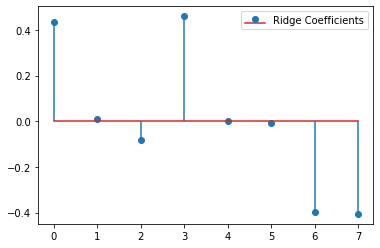

In [ ]:
# Using the linear regression weights. Counter gives us the highest coefficients in the dictionary created below
from sklearn.feature_selection import SelectFromModel

# Run the ridge regression model for different values of alpha
param_selected = {'alpha': alpha_range}

r_coef_gs = GridSearchCV(estimator = Ridge(),
                        param_grid = param_selected,
                        cv = 5,
                        scoring = 'neg_mean_squared_error')

r_coef_gs.fit(X_train, Y_train)

# We can see the most important features in terms of their coefficients 2 ways:
# We can create a dictionary of all of the coefficients
coef_list = r_coef_gs.best_estimator_.coef_
coef_dict = {column_names[i] : abs(coef_list[i]) for i in range(len(column_names))}
print('The absolute coefficients of each feature are:')
for key, value in coef_dict.items():
  print(key, ": ", value)

# And choose the highest absolute values (magnitudes)
co = Counter(coef_dict)
high = co.most_common(3)
print("\nThe 3 features with the largest absolute coefficients:")
for key, value in high:
    print(key, value, f"where the column index of this feature is {list(coef_dict.keys()).index(key)}")

# Given the indices given by this dictionary, we can select our data

# We can also choose the feat_ridge best features from the SelectFromModel function with Ridge estimator
# Our r_coef_gs showed that alpha is 100, so this is what we use for our parameter here
print(f'\nThe optimal value of alpha is: {r_coef_gs.best_params_}')
feat_ridge = 3
sel_ridge = SelectFromModel(estimator = Ridge(alpha = 100), max_features = feat_ridge, threshold = -1).fit(X_train, Y_train)
print(f"\n{feat_ridge} best features using SelectFromModel:\n {([column_names[id] for (id, mask) in enumerate(sel_ridge.get_support()) if mask])}")

# Visualisation
plt.figure()
plt.stem(coef_list, markerfmt='o', label = 'Ridge Coefficients', use_line_collection=True)
plt.legend()



# Exercise 2, part 3: Analysis of the results

SelectKBest works well on univariate sets. This is appropriate since we are just basing our selection on regression.
In terms of the two feature selection methods used regarding coefficients of the solution, SelectFromModel does not deal in absolute values, and so gives the largest coefficients a1, a2, a3 etc. where a1 > a2 > a3, whereas the dictionary method gives a1, a2, a3, where |a1| > |a2| > |a3|.

# Exercise 2, part 4: Retraining the Ridge model using feature selection

In [ ]:
# Using feature selection from SelectFromModel on the Ridge model
X_train_ridge_sel = sel_ridge.transform(X_train)
X_test_ridge_sel = sel_ridge.transform(X_test)

# Using feature selection from the kNN model
X_train_knn_sel = selector.transform(X_train)
X_test_knn_sel = selector.transform(X_test)

# We define our pipeline with 3 steps:
ridge_pipe_sel = Pipeline([('poly', PolynomialFeatures()),
                 ('scaler', StandardScaler()),
                 ('ridge', Ridge())])

# Define our tuning parameters: polynomial degree, and regularisation parameter
ridge_params_sel = {'poly__degree': [1, 5, 10, 15],
          'ridge__alpha': alpha_range}

# Define the grid function with a 5 fold cross-validation, using MSE as the judge
ridge_gs_sel = GridSearchCV(estimator = ridge_pipe_sel,
                  param_grid = ridge_params_sel,
                  scoring = 'neg_mean_squared_error',
                  cv = 5)

# Duplicate this
knn_gs_sel = ridge_gs_sel

# Fit the grid search function to the ridge feature selection data, and make predictions on the test set
ridge_gs_sel.fit(X_train_ridge_sel, Y_train)
ridge_test_sel = ridge_gs_sel.predict(X_test_ridge_sel)

# Do the same for the knn feature selection data
knn_gs_sel.fit(X_train_knn_sel, Y_train)
knn_test_sel = knn_gs_sel.predict(X_test_knn_sel)

# MSE and best parameters
print(f'Best alpha and polynomial degree using SelectFromModel selection features is: {ridge_gs_sel.best_params_}')
print(f'The MSE using ridge selection features is:{np.mean((Y_test - ridge_test_sel)**2)}\n')
print(f'Best alpha and polynomial degree using kNN selection features is: {knn_gs_sel.best_params_}')
print(f'The MSE using SelectKBest selection features is:{np.mean((Y_test - knn_test_sel)**2)}')

Best alpha and polynomial degree using SelectFromModel selection features is: {'poly__degree': 15, 'ridge__alpha': 1e-06}
The MSE using ridge selection features is:0.7140497222443206

Best alpha and polynomial degree using kNN selection features is: {'poly__degree': 15, 'ridge__alpha': 1e-06}
The MSE using SelectKBest selection features is:0.46754197054302515


# Exercise 3, part 1: MI regression

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# We first select the 3 best features based on the mutual information regression model
feat_mir = 3
sel_mir = selector = SelectKBest(mutual_info_regression, k=feat_mir)
sel_mir.fit(X_train, Y_train)
print(f"{feat_mir} best features: {([column_names[id] for (id, mask) in enumerate(sel_mir.get_support()) if mask])}")

# Adapt the data to the selected features
X_train_mir_sel = sel_mir.transform(X_train)
X_test_mir_sel = sel_mir.transform(X_test)

# We use the same model as before, only this time with our features selected from MI
ridge_gs_sel.fit(X_train_mir_sel, Y_train)
ridge_test_mir = ridge_gs_sel.predict(X_test_mir_sel)

# Calculate MSE
print(f'The MSE using MI selection features is:{np.mean((Y_test - ridge_test_mir)**2)}')

3 best features: ['MedInc', 'Latitude', 'Longitude']
The MSE using MI selection features is:0.46754197054302515


# Exercise 3, part 2: Greedy searches

When discussing whether to use forward of backward feature selection methods, we can consider the compromise between computational complexity and accuracy. Given that here we have only a few features, the difference in computational time between the forward and backward models is likely to be small. This means that we can choose the method which explores the most sets of solutions, and therefore is likely to give the most accuracy. In the case where k < n/2 (where k is the number of features to be selected and n is the number of features in the set), the backward search is likely to be more accurate, because it explores more sets of solutions. In the case of k > n/2, it is the forward method. If n = k/2, these methods are likely to be comparable.

The method which is computationally more expensive is to be preferred, because the difference in computation time is small, but the difference in accuracy could be large. In the case of k = 3, this is backward selection.

In this particular case, we can see below that backwards selection gives the same feature selection as MI, which is so far by far our best estimate, so our statement above is in some way validated. HOWEVER, we explore the forward method to see if we can improve on this, because the result for the backward method for this case is already known through the MI selection run in exercise 3, part 1.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_n = 3

# Use SequentialFeatureSelector to implement a greedy feature selection process with sfs_n best features
# Forward selection
sfs_f_selector = SequentialFeatureSelector(estimator=Ridge(),
                                           n_features_to_select = sfs_n,
                                           cv =5,
                                           scoring = 'neg_mean_squared_error',
                                           direction ='forward')

sfs_f_selector.fit(X_train, Y_train)
print(f"{sfs_n} best features using forward selection: {([column_names[id] for (id, mask) in enumerate(sfs_f_selector.get_support()) if mask])}")

# Backward selection
sfs_b_selector = SequentialFeatureSelector(estimator=Ridge(),
                                           n_features_to_select = sfs_n,
                                           cv =5,
                                           scoring = 'neg_mean_squared_error',
                                           direction ='backward')

sfs_b_selector.fit(X_train, Y_train)
print(f"{sfs_n} best features using backward selection: {([column_names[id] for (id, mask) in enumerate(sfs_b_selector.get_support()) if mask])}")

# Using the forward search feature selection with the polynomial ridge regression model
# Using the same pipeline as in the previous section, and fitting it to the selected features from the forward method

# Transform the training data
X_train_for_sel = sfs_f_selector.transform(X_train)
X_test_for_sel = sfs_f_selector.transform(X_test)

# Fit to the forward selection data
ridge_gs_sel.fit(X_train_for_sel, Y_train)
ridge_test_for = ridge_gs_sel.predict(X_test_for_sel)

# Calculate MSE
print(f'The MSE using forward selection features is:{np.mean((Y_test - ridge_test_for)**2)}')
# State the MSE for backward selection = MI selection, just for direct comparison
print(f'The MSE using backward selection features is:{np.mean((Y_test - ridge_test_mir)**2)}')

3 best features using forward selection: ['MedInc', 'HouseAge', 'Latitude']
3 best features using backward selection: ['MedInc', 'Latitude', 'Longitude']
The MSE using forward selection features is:0.5950305960890183
The MSE using backward selection features is:0.46754197054302515


Through running the feature selection methods, we can see that backwards greedy selection provides the best results when using a ridge method over the stated alpha and polynomial degree range - this is equal to MI feature selection, but computationally less expensive so to be preferred.